In [ ]:
%matplotlib inline


# K medias sobre datasets simulados con diferentes gaussianas 


K medias es optimo para determinar agrupamientos dprovenientes de Gaussianas esfericas.

Si los datos fueron generdos por gausianas anisotropicas o muy cercanas, K medias no logra diferenciar correctamente los grupos.

El problema de grupos muy cercanos lo tienen todos los métodos.



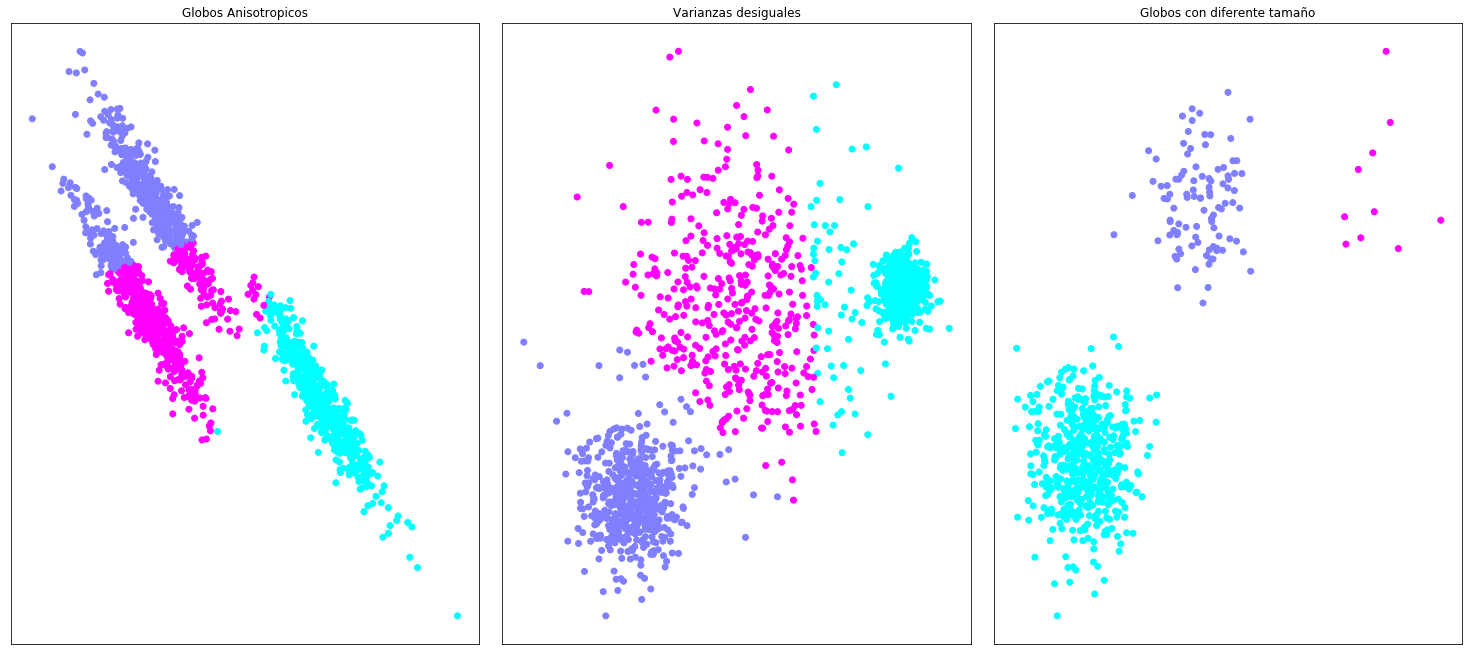

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(9 * 2 + 3, 9))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)
plt.set_cmap('cool')
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
plt.xticks(())
plt.yticks(())
plt.subplot(131)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Globos Anisotropicos")
plt.xticks(())
plt.yticks(())

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(132)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Varianzas desiguales")
plt.xticks(())
plt.yticks(())

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(133)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Globos con diferente tamaño")

plt.xticks(())
plt.yticks(())
#plt.savefig('kmeans2.png', dpi=300)
plt.show()